In [ ]:
# Покрутим датасет из телекома, попробуем верхнеуровнево предсказать целевой признак Churn - уйдет от нас клиент или нет 

In [2]:
import pandas as pd

In [5]:
from matplotlib import pyplot as plt

In [9]:
!pip install seaborn 
import seaborn as sns

In [12]:
df = pd.read_csv("../../data/telecom_Churn.csv")

In [14]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
df.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [18]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

(       Account length    Area code  Number vmail messages  Total day minutes  \
 count     3333.000000  3333.000000            3333.000000        3333.000000   
 mean       101.064806   437.182418               8.099010         179.775098   
 std         39.822106    42.371290              13.688365          54.467389   
 min          1.000000   408.000000               0.000000           0.000000   
 25%         74.000000   408.000000               0.000000         143.700000   
 50%        101.000000   415.000000               0.000000         179.400000   
 75%        127.000000   510.000000              20.000000         216.400000   
 max        243.000000   510.000000              51.000000         350.800000   
 
        Total day calls  Total day charge  Total eve minutes  Total eve calls  \
 count      3333.000000       3333.000000        3333.000000      3333.000000   
 mean        100.435644         30.562307         200.980348       100.114311   
 std          20.069084   

In [19]:
# количественные признаки # 

<Axes: >

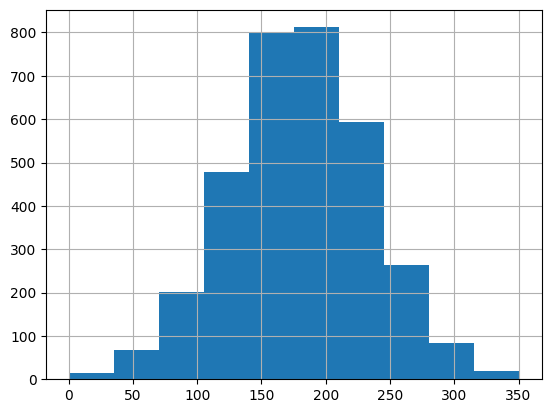

In [20]:
df['Total day minutes'].hist()

<Axes: ylabel='Total day minutes'>

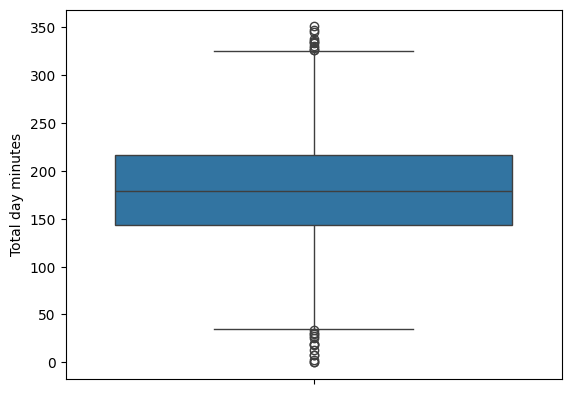

In [25]:
sns.boxplot(df['Total day minutes']) 
# квартили .25 и .75 - границы
# медиана в центре
# край усов - полтора интерквартильного размаха

array([[<Axes: title={'center': 'Account length'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'Number vmail messages'}>,
        <Axes: title={'center': 'Total day minutes'}>],
       [<Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total day charge'}>,
        <Axes: title={'center': 'Total eve minutes'}>,
        <Axes: title={'center': 'Total eve calls'}>],
       [<Axes: title={'center': 'Total eve charge'}>,
        <Axes: title={'center': 'Total night minutes'}>,
        <Axes: title={'center': 'Total night calls'}>,
        <Axes: title={'center': 'Total night charge'}>],
       [<Axes: title={'center': 'Total intl minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>,
        <Axes: title={'center': 'Total intl charge'}>,
        <Axes: title={'center': 'Customer service calls'}>]], dtype=object)

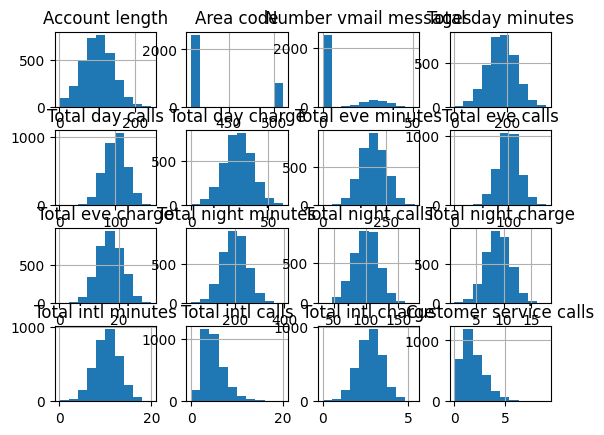

In [26]:
df.hist()

In [28]:
# Исследование КАТЕГОРИАЛЬНЫХ и БИНАРНЫХ ПРИЗНАКОВ признаков #
# Категориальный - например, штат

In [29]:
df['State'].value_counts().head()

State
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64

In [30]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

<Axes: ylabel='count'>

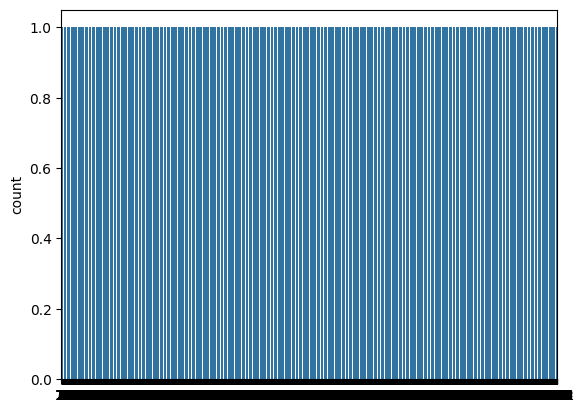

In [34]:
sns.countplot(df['Churn'])

<Axes: xlabel='count', ylabel='State'>

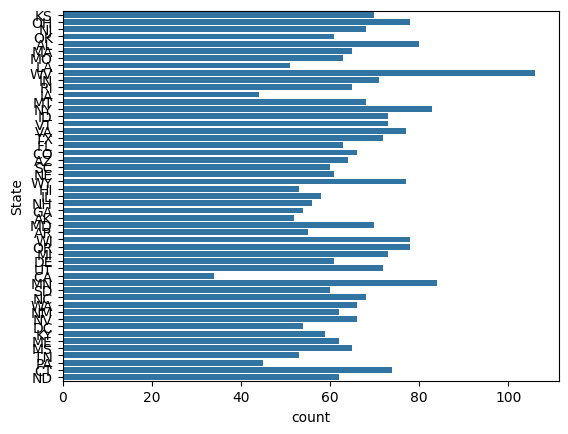

In [35]:
sns.countplot(df['State'])

In [40]:
top_states = df[df['State'].isin(df['State'].value_counts().head().index)]

In [44]:
# РАСПРЕДЕЛЕНИЕ ПЯТИ САМЫХ ПОПУЛЯРНЫХ ШТАТОВ В ДАТАСЕТЕ

<Axes: xlabel='count', ylabel='State'>

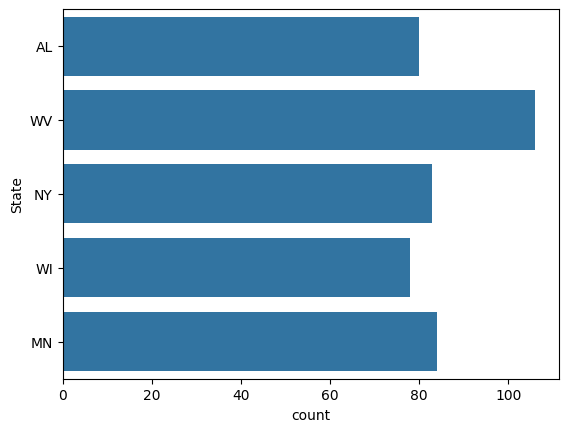

In [43]:
sns.countplot(top_states['State'])

In [ ]:
# Взаимодействия количественных признаков

In [45]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [46]:
features = [ f for f in df.columns if 'charge' in f]

In [47]:
print(features)

['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


array([[<Axes: title={'center': 'Total day charge'}>,
        <Axes: title={'center': 'Total eve charge'}>],
       [<Axes: title={'center': 'Total night charge'}>,
        <Axes: title={'center': 'Total intl charge'}>]], dtype=object)

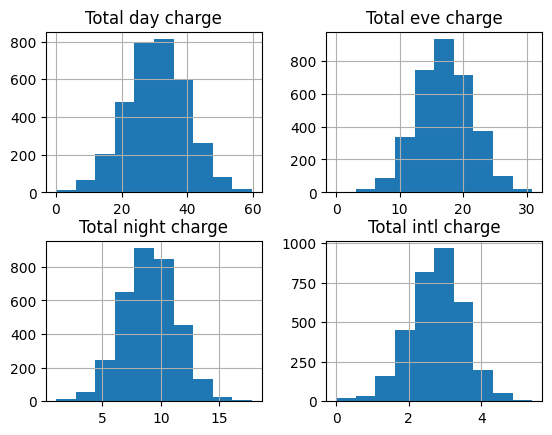

In [48]:
df[features].hist()

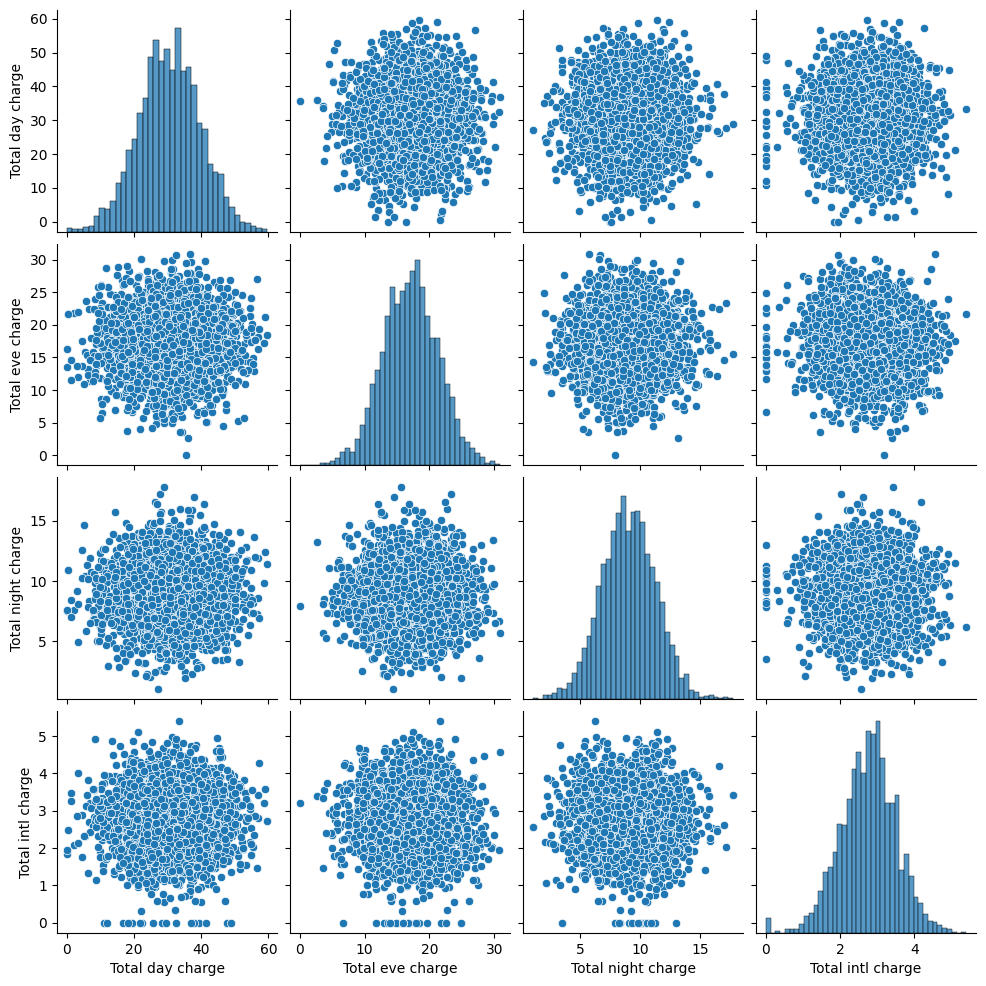

In [49]:
sns.pairplot(df[features])

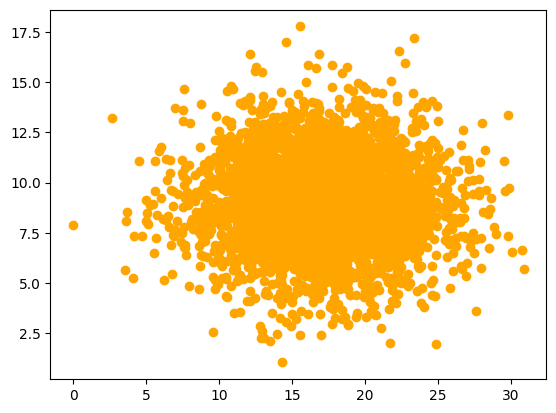

In [52]:
plt.scatter(df['Total eve charge'] , df['Total night charge'] , color = 'orange')

In [55]:
df['Churn'].map( {False: 'blue', True: 'orange'}).head

<bound method NDFrame.head of 0       blue
1       blue
2       blue
3       blue
4       blue
        ... 
3328    blue
3329    blue
3330    blue
3331    blue
3332    blue
Name: Churn, Length: 3333, dtype: object>

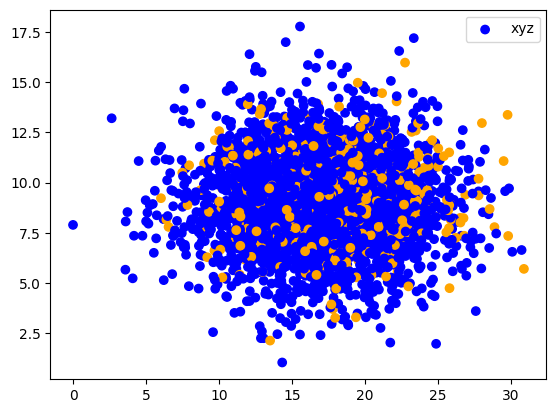

In [58]:
plt.scatter(df['Total eve charge'] , df['Total night charge'] , color = df['Churn'].map( {False: 'blue', True: 'orange'}), label = 'xyz')
plt.legend()

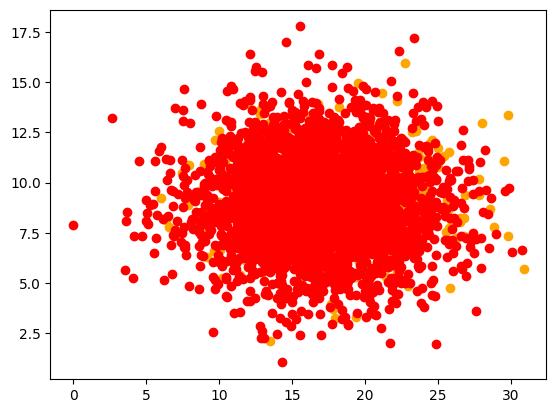

In [64]:
plt.scatter(df[df['Churn']]['Total eve charge'] ,df[df['Churn']]['Total night charge'] , color = 'orange', label = 'CHURN'),
plt.scatter(df[~df['Churn']]['Total eve charge'] ,df[~df['Churn']]['Total night charge'] , color = 'red', label = 'CHURN')

In [51]:
#ВЫШЕ ДИАГРАММЫ РАССЕИВАНИЯ - ОТКЛАДЫВАЕМ ДВА КОЛИЧЕТСВЕННЫХ ПРИЗНАКА ПО ОСЯМ

In [ ]:
#НИЖЕ КАТЕГОРИЛЬНЫЕ ПРИЗНАКИ#

In [69]:
df.corr(numeric_only=True)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [ ]:
# МАТРИЦА КОРРЕЛЯЦИИ #

<Axes: >

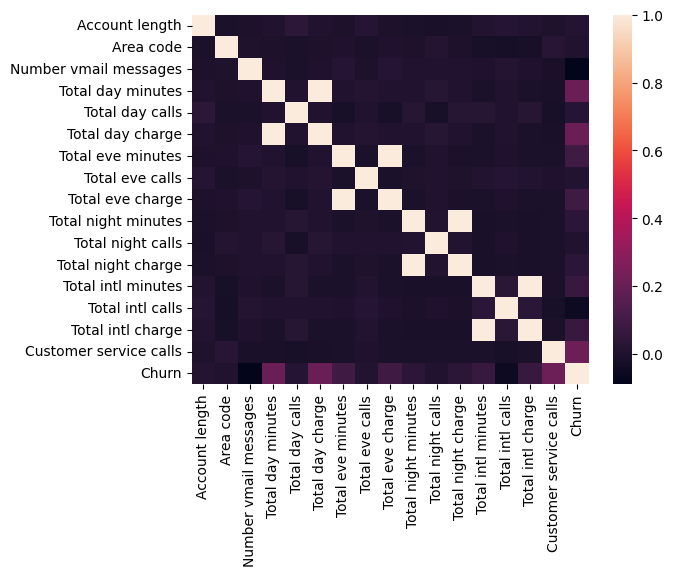

In [68]:
sns.heatmap(df.corr(numeric_only=True))

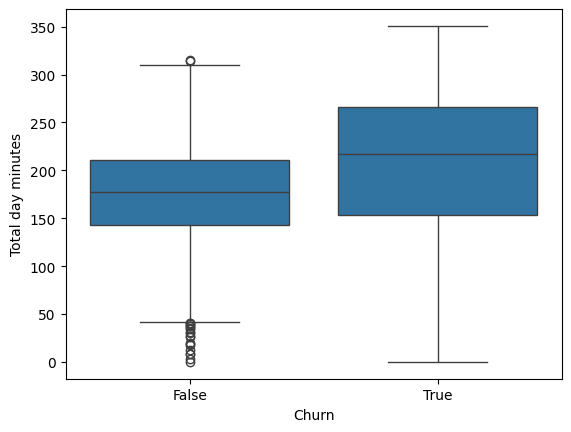

In [72]:
sns.boxplot(x = 'Churn', y = 'Total day minutes', data = df);

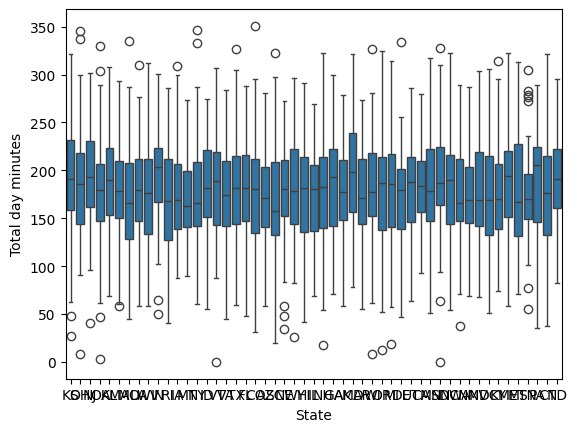

In [73]:
sns.boxplot(x = 'State', y = 'Total day minutes', data = df);

<Axes: xlabel='Churn', ylabel='Total day minutes'>

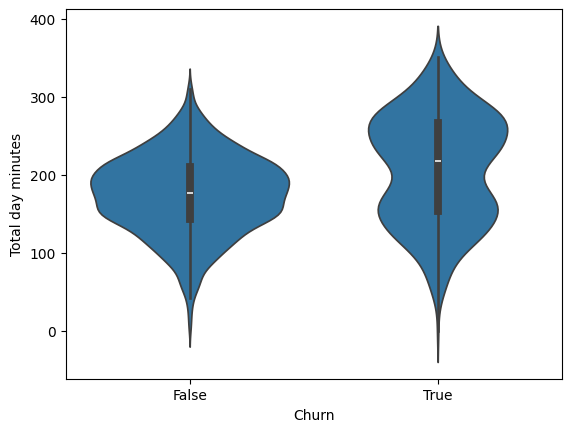

In [74]:
sns.violinplot(x='Churn', y = 'Total day minutes', data=df)

In [77]:
# ДАЛЬШЕ t-SNE #

In [81]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/37/a9/08538c29f188b1c37eb6e115a5046c6d17457e1a7b8ea748edd3017ddd6c/scikit_learn-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/f4/ce/be0b376ba6069f3f8ba240aa532a374733447453c93582d4c474effdde21/scipy-1.11.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from sklearn.manifold import TSNE

In [83]:
tsne = TSNE(random_state=0)

In [84]:
df2 = df.drop('State', axis = 1) 

In [85]:
#удалили 1 столбец строкового признака #

In [88]:
df2['International plan'] = df2['International plan'].map({ 'Yes':1, 'No':0 })

In [89]:
df2['Voice mail plan'] = df2['Voice mail plan'].map({ 'Yes':1, 'No':0 })

In [90]:
df2.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [93]:
%%time
tsne.fit(df2)

CPU times: total: 1min 32s
Wall time: 6.75 s


TSNE(random_state=0)

In [95]:
tsne.embedding_.shape

(3333, 2)

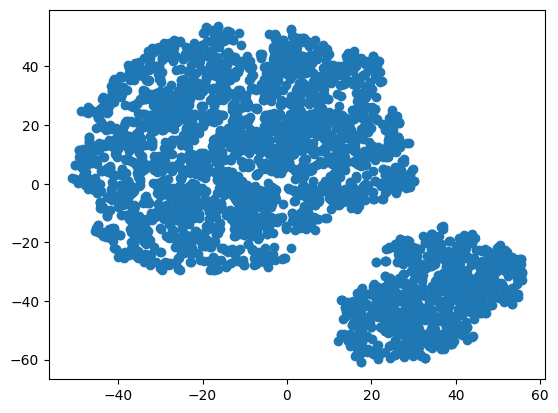

In [98]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1])

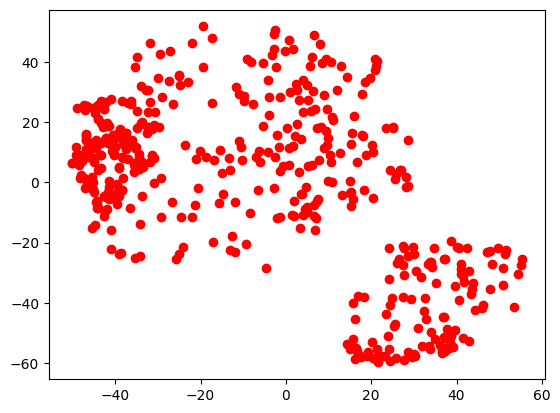

In [99]:
plt.scatter(tsne.embedding_[df2['Churn'].values,0], tsne.embedding_[df2['Churn'].values,1], color = 'red')

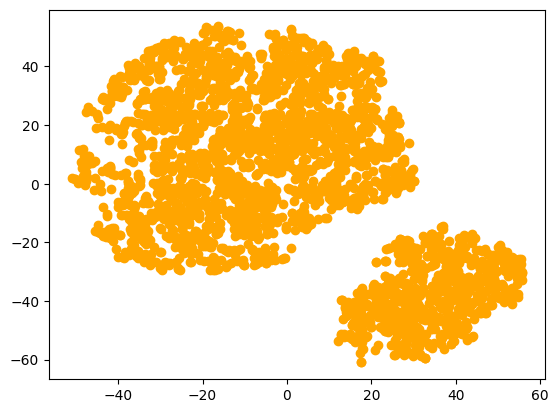

In [100]:
plt.scatter(tsne.embedding_[~df2['Churn'].values,0], tsne.embedding_[~df2['Churn'].values,1], color = 'orange')

(<matplotlib.collections.PathCollection at 0x1c7f80986b0>,
 <matplotlib.collections.PathCollection at 0x1c7f8299fa0>)

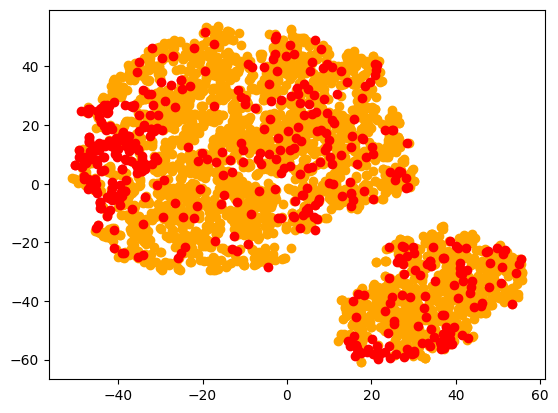

In [101]:
plt.scatter(tsne.embedding_[~df2['Churn'].values,0], tsne.embedding_[~df2['Churn'].values,1], color = 'orange'), plt.scatter(tsne.embedding_[df2['Churn'].values,0], tsne.embedding_[df2['Churn'].values,1], color = 'red')